In [1]:
import pandas as pd
import numpy as np
from pyplutchik import plutchik
import itertools

In [2]:
df=pd.read_csv("responses.csv", header=1)

In [3]:
df

,Timestamp,Which speech have you listened to/read?,How much time did you spend reading the speech/hearing the speech?(In Minutes),1. the speech was trying to convey feelings of Anger,2. the speech was trying to convey feelings of Anticipation,3. the speech was trying to convey feelings of Joy,4. the speech was trying to convey feelings of Trust,5. the speech was trying to convey feelings of Fear,6. the speech was trying to convey feelings of Surprise,7. the speech was trying to convey feelings of Sadness,8. the speech was trying to convey feelings of Disgust
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/17/2023 22:58:21,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",6.0,7.0,5.0,7.0,10.0,4.0,4.0,7.0,8.0
3,10/17/2023 23:01:44,Barack Obama's Farewell Address (2017):https:/...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10/17/2023 23:03:00,Steve Jobs' Stanford Commencement Speech (2005...,75.0,0.0,6.0,2.0,10.0,1.0,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
67,11/1/2023 19:17:05,Nelson Mandela's Inaugural Address (1994):http...,9.0,5.0,10.0,10.0,10.0,2.0,0.0,5.0,0.0
68,11/1/2023 20:58:36,Barack Obama's Farewell Address (2017):https:/...,8.0,0.0,5.0,7.0,8.0,1.0,4.0,5.0,0.0
69,11/1/2023 21:01:37,Steve Jobs' Stanford Commencement Speech (2005...,16.0,2.0,7.0,5.0,8.0,4.0,5.0,5.0,0.0
70,11/1/2023 21:08:54,Malala Yousafzai's United Nations Speech (2013...,18.0,0.0,9.0,5.0,8.0,2.0,2.0,8.0,0.0


In [4]:
df.dropna(how='all', inplace=True)

In [5]:
df

,Timestamp,Which speech have you listened to/read?,How much time did you spend reading the speech/hearing the speech?(In Minutes),1. the speech was trying to convey feelings of Anger,2. the speech was trying to convey feelings of Anticipation,3. the speech was trying to convey feelings of Joy,4. the speech was trying to convey feelings of Trust,5. the speech was trying to convey feelings of Fear,6. the speech was trying to convey feelings of Surprise,7. the speech was trying to convey feelings of Sadness,8. the speech was trying to convey feelings of Disgust
2,10/17/2023 22:58:21,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",6.0,7.0,5.0,7.0,10.0,4.0,4.0,7.0,8.0
3,10/17/2023 23:01:44,Barack Obama's Farewell Address (2017):https:/...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10/17/2023 23:03:00,Steve Jobs' Stanford Commencement Speech (2005...,75.0,0.0,6.0,2.0,10.0,1.0,3.0,5.0,0.0
5,10/17/2023 23:10:26,"Martin Luther King Jr.'s ""I Have a Dream"" Spee...",60.0,0.0,1.0,8.0,4.0,1.0,7.0,1.0,0.0
6,10/17/2023 23:12:55,Greta Thunberg's Climate Change Speeches :http...,76.0,6.0,7.0,3.0,5.0,6.0,2.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
67,11/1/2023 19:17:05,Nelson Mandela's Inaugural Address (1994):http...,9.0,5.0,10.0,10.0,10.0,2.0,0.0,5.0,0.0
68,11/1/2023 20:58:36,Barack Obama's Farewell Address (2017):https:/...,8.0,0.0,5.0,7.0,8.0,1.0,4.0,5.0,0.0
69,11/1/2023 21:01:37,Steve Jobs' Stanford Commencement Speech (2005...,16.0,2.0,7.0,5.0,8.0,4.0,5.0,5.0,0.0
70,11/1/2023 21:08:54,Malala Yousafzai's United Nations Speech (2013...,18.0,0.0,9.0,5.0,8.0,2.0,2.0,8.0,0.0


In [6]:
dict = {'Timestamp': 'timestamp',
        'Which speech have you listened to/read?': 'speech_no',
        'How much time did you spend reading the speech/hearing the speech?(In Minutes)': 'time_spent',
    '1. the speech was trying to convey feelings of Anger': 'anger',
        '2. the speech was trying to convey feelings of Anticipation': 'anticipation',
        '3. the speech was trying to convey feelings of Joy': 'joy',
       '4. the speech was trying to convey feelings of Trust': 'trust',
       '5. the speech was trying to convey feelings of Fear': 'fear',
       '6. the speech was trying to convey feelings of Surprise': 'surprise',
       '7. the speech was trying to convey feelings of Sadness': 'sadness',
       '8. the speech was trying to convey feelings of Disgust': 'disgust'}

In [7]:
df.rename(columns=dict,
          inplace=True)

In [8]:
cleanup_nums = {'''Winston Churchill's "We Shall Fight on the Beaches" Speech (1940):https://winstonchurchill.org/resources/speeches/1940-the-finest-hour/we-shall-fight-on-the-beaches/ Video:https://www.youtube.com/watch?v=skrdyoabmgA''':"1",
'''John F. Kennedy's Inaugural Address (1961):https://www.archives.gov/milestone-documents/president-john-f-kennedys-inaugural-address Video: https://www.youtube.com/watch?v=PEC1C4p0k3E''':"2",
'''Nelson Mandela's Inaugural Address (1994):https://www.africa.upenn.edu/Articles_Gen/Inaugural_Speech_17984.html Video: https://www.youtube.com/watch?v=pJiXu4q__VU''':"3",
'''Steve Jobs' Stanford Commencement Speech (2005):https://academyatthelakes.org/wp-content/uploads/2016/02/SteveJobsatStanfordUniversityExcerpts.pdf Video: https://www.youtube.com/watch?v=UF8uR6Z6KLc''':"4",
'''Malala Yousafzai's United Nations Speech (2013):https://awpc.cattcenter.iastate.edu/2018/03/05/un-speech-on-youth-education-july-12-2013/ Video:https://www.youtube.com/watch?v=5SClmL43dTo''':"5",
'''Elie Wiesel's Nobel Peace Prize Acceptance Speech (1986):https://sfponline.org/Uploads/66/ElieWieselspeech.pdf''':"6",
'''Greta Thunberg's Climate Change Speeches :https://www.npr.org/2019/09/23/763452863/transcript-greta-thunbergs-speech-at-the-u-n-climate-action-summit#:~:text=%22The%20popular%20idea%20of%20cutting,may%20be%20acceptable%20to%20you Video: https://www.youtube.com/watch?v=KAJsdgTPJpU''':"7",
'''Barack Obama's Farewell Address (2017):https://www.politico.com/story/2017/01/full-text-obama-farewell-speech-transcript-233916''':"8",
'''Aung San Suu Kyi's Nobel Lecture (2012):https://www.nobelprize.org/prizes/peace/1991/kyi/26193-aung-san-suu-kyi-nobel-lecture-english/ Video: https://www.youtube.com/watch?v=NihXxEDFIBM''':"9",
               '''Martin Luther King Jr.'s "I Have a Dream" Speech (1963):https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety Video: https://www.youtube.com/watch?v=vP4iY1TtS3s''':"10"}

In [9]:
df=df.iloc[:,[0,1,2,5,6,7,8,9,10,3,4]]


In [10]:
df=df.replace(cleanup_nums)
df

,timestamp,speech_no,time_spent,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
2,10/17/2023 22:58:21,10,6.0,7.0,10.0,4.0,4.0,7.0,8.0,7.0,5.0
3,10/17/2023 23:01:44,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10/17/2023 23:03:00,4,75.0,2.0,10.0,1.0,3.0,5.0,0.0,0.0,6.0
5,10/17/2023 23:10:26,10,60.0,8.0,4.0,1.0,7.0,1.0,0.0,0.0,1.0
6,10/17/2023 23:12:55,7,76.0,3.0,5.0,6.0,2.0,7.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
67,11/1/2023 19:17:05,3,9.0,10.0,10.0,2.0,0.0,5.0,0.0,5.0,10.0
68,11/1/2023 20:58:36,8,8.0,7.0,8.0,1.0,4.0,5.0,0.0,0.0,5.0
69,11/1/2023 21:01:37,4,16.0,5.0,8.0,4.0,5.0,5.0,0.0,2.0,7.0
70,11/1/2023 21:08:54,5,18.0,5.0,8.0,2.0,2.0,8.0,0.0,0.0,9.0


In [11]:
cols_to_average = df.columns[-8:]

In [12]:
df_grouped = df.groupby('speech_no')[cols_to_average].mean()

In [13]:
df_grouped

,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
speech_no,,,,,,,,
1,2.714286,7.714286,2.000000,2.714286,1.571429,1.571429,7.714286,6.571429
10,5.769231,7.928571,2.571429,2.500000,5.357143,3.714286,4.428571,6.846154
2,7.250000,8.250000,1.750000,2.000000,0.500000,0.500000,1.750000,7.000000
3,10.000000,9.666667,1.666667,1.666667,3.333333,0.000000,4.000000,8.666667
4,5.727273,6.545455,3.818182,3.000000,4.181818,1.272727,1.909091,6.181818
5,3.666667,6.500000,1.500000,3.000000,7.666667,4.833333,2.833333,5.166667
7,0.900000,3.300000,8.300000,3.800000,8.800000,7.700000,8.000000,6.700000
8,5.857143,7.142857,0.857143,4.000000,5.428571,0.285714,1.571429,5.000000
9,8.333333,5.000000,2.666667,4.666667,3.000000,0.666667,3.333333,6.000000


In [14]:
cols_to_divide = df_grouped.columns[-8:]

In [15]:
df_grouped[cols_to_divide] = df_grouped[cols_to_divide] / 10

In [16]:
records=df_grouped.to_dict(orient='records')

In [17]:
records

[{'joy': 0.27142857142857146,
  'trust': 0.7714285714285715,
  'fear': 0.2,
  'surprise': 0.27142857142857146,
  'sadness': 0.15714285714285714,
  'disgust': 0.15714285714285714,
  'anger': 0.7714285714285715,
  'anticipation': 0.6571428571428571},
 {'joy': 0.5769230769230769,
  'trust': 0.7928571428571429,
  'fear': 0.2571428571428572,
  'surprise': 0.25,
  'sadness': 0.5357142857142857,
  'disgust': 0.37142857142857144,
  'anger': 0.4428571428571429,
  'anticipation': 0.6846153846153846},
 {'joy': 0.725,
  'trust': 0.825,
  'fear': 0.175,
  'surprise': 0.2,
  'sadness': 0.05,
  'disgust': 0.05,
  'anger': 0.175,
  'anticipation': 0.7},
 {'joy': 1.0,
  'trust': 0.9666666666666666,
  'fear': 0.16666666666666669,
  'surprise': 0.16666666666666669,
  'sadness': 0.33333333333333337,
  'disgust': 0.0,
  'anger': 0.4,
  'anticipation': 0.8666666666666666},
 {'joy': 0.5727272727272728,
  'trust': 0.6545454545454545,
  'fear': 0.38181818181818183,
  'surprise': 0.3,
  'sadness': 0.41818181818

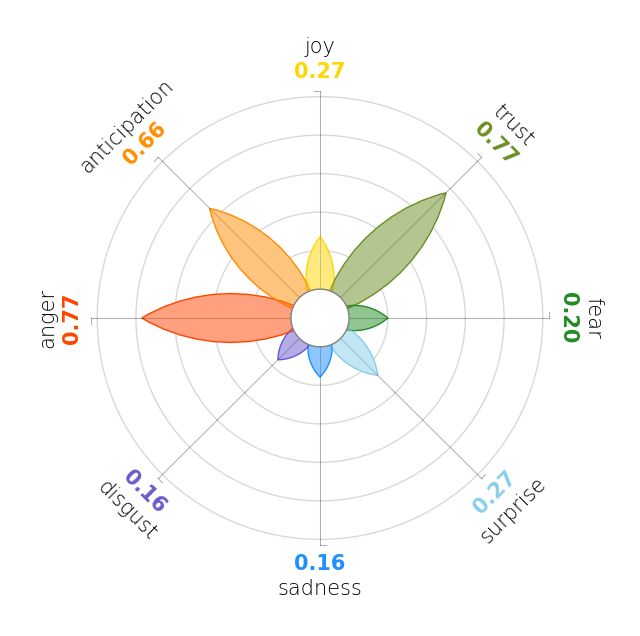

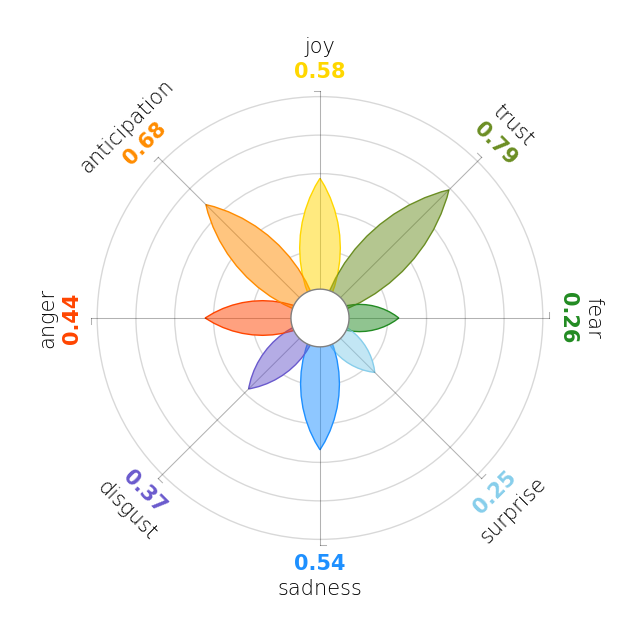

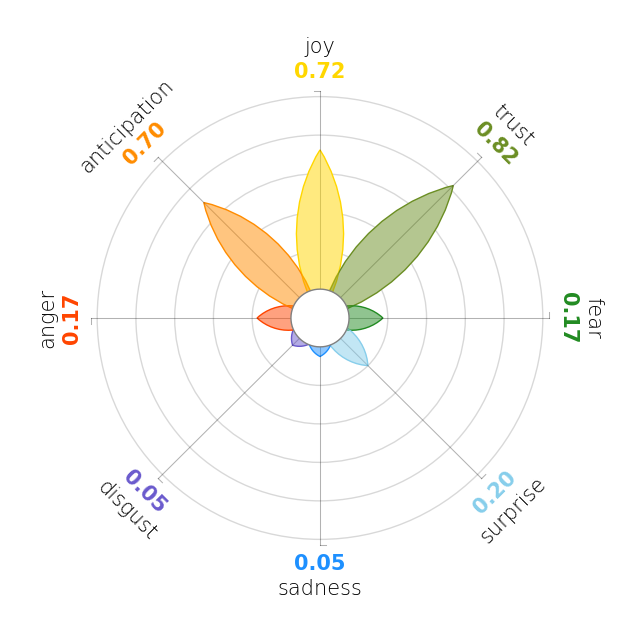

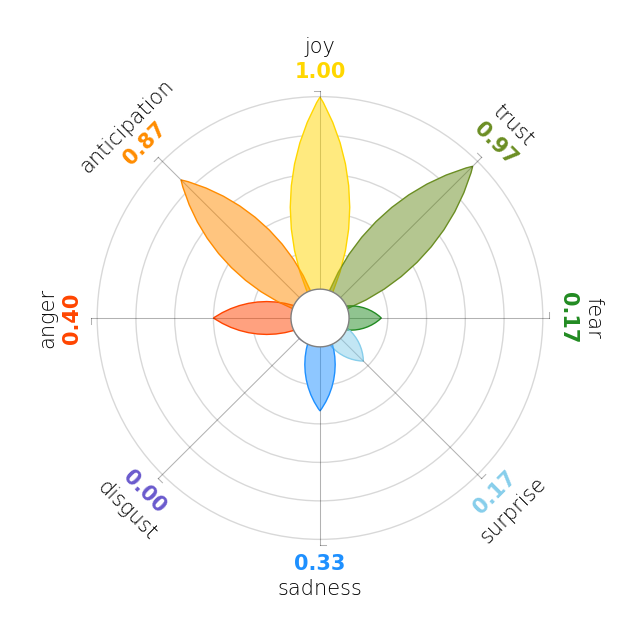

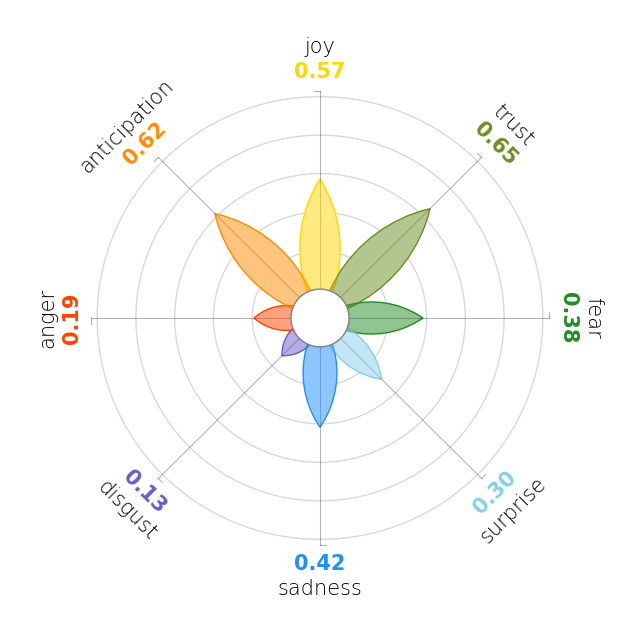

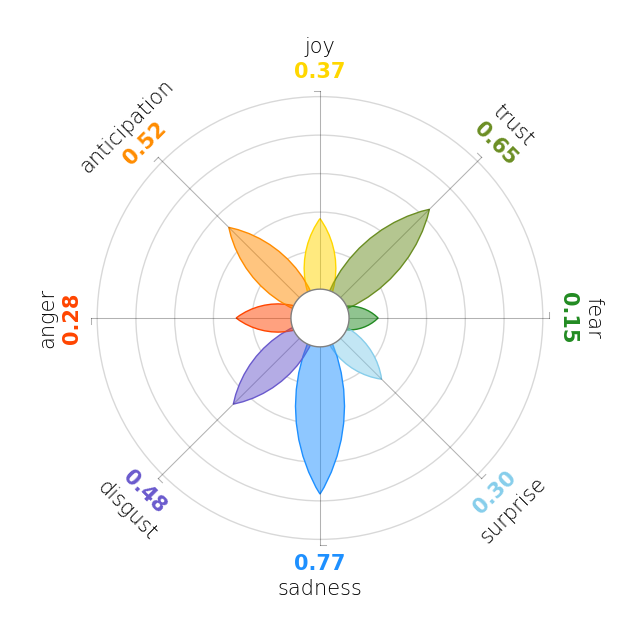

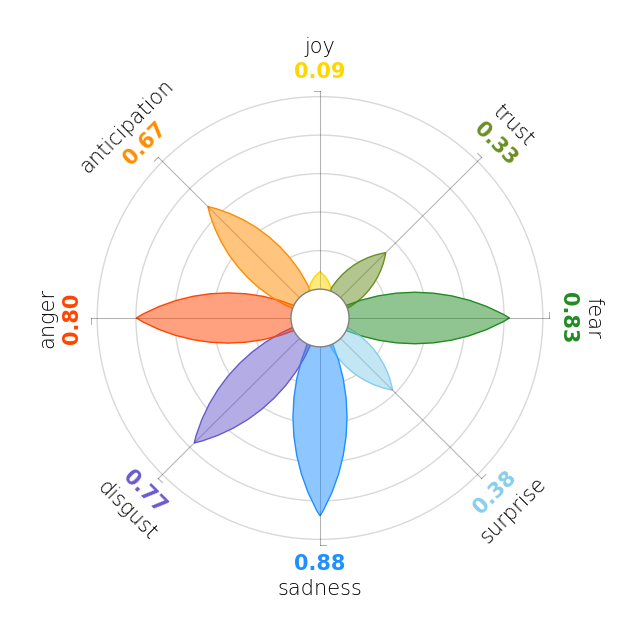

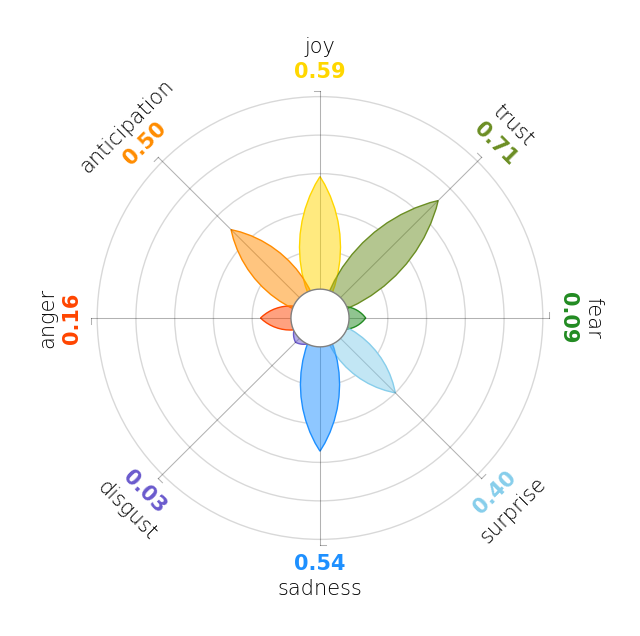

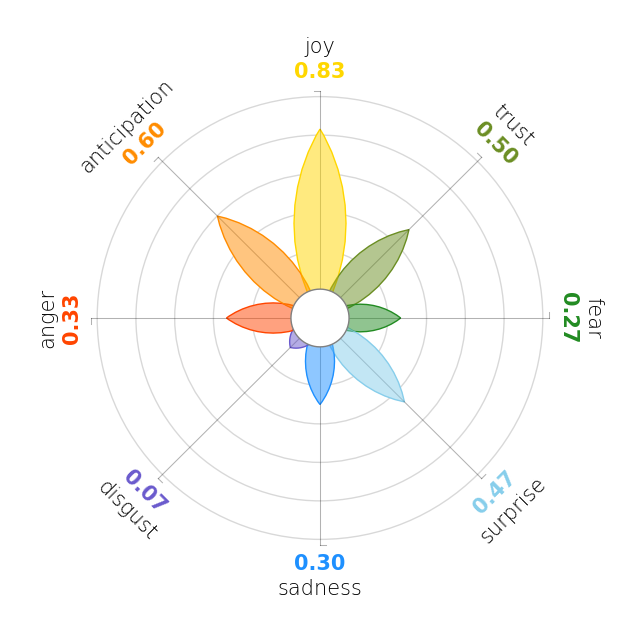

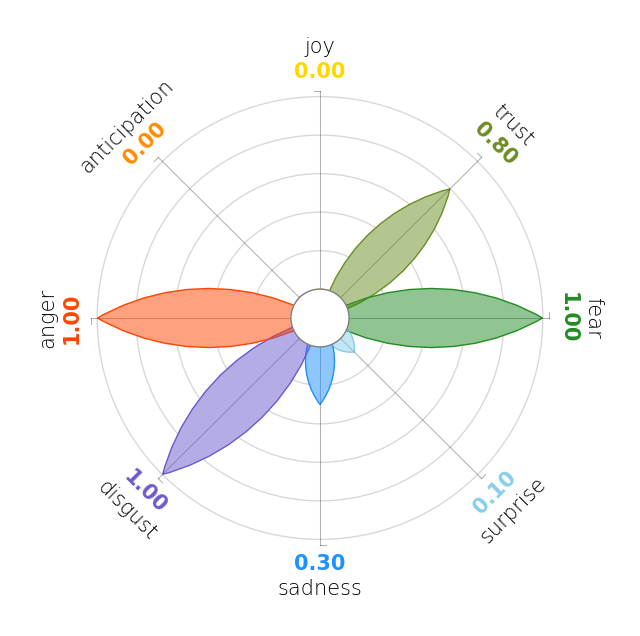

In [18]:
for record in records:
    plutchik(record)

In [23]:
#ignore this for now
primary_dyads = {('joy','trust'): 'love', ('fear','trust'): 'submission', ('fear','surprise'): 'alarm', 
                 ('sadness','surprise'): 'disappointment', ('disgust','sadness'): 'remorse', ('anger','disgust'): 'contempt', 
                 ('anger','anticipation'): 'aggressiveness', ('anticipation','joy'): 'optimism'}

secondary_dyads = {('anticipation','trust'):'hope',('fear','joy'):'guilt',('surprise','trust'):'curiosity',('fear','sadness'):'dispair',
                   ('anger','sadness'):'envy',('anticipation','disgust'):'cynism',('anger','joy'):'pride'}

tertiary_dyads = {('anger','trust'):'dominance',('anticipation','fear'):'anxiety',('joy','surprise'):'delight',
                  ('sadness','trust'):'sentimentality',('disgust','fear'):'shame',('anger','surprise'):'outrage',
                  ('anticipation','sadness'):'pessimism',('disgust','joy'):'morbidness'}

opposite_dyads = {('joy','sadness'):'bittersweetness',('disgust','trust'):'ambivalence',('anger','fear'):'frozenness',
                  ('anticipation','surprise'):'confusion'}
plutchik_wheel = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

In [24]:
#ignore
def find_state(emotion1, emotion2):
    if emotion1<emotion2:
        emo1=emotion1
        emo2=emotion2
    else:
        emo1=emotion2
        emo2=emotion1
    index1=plutchik_wheel.index(emo1)
    index2=plutchik_wheel.index(emo2)
    distance=abs(index1-index2) % 8

    if distance>4:
        distance=8-distance
    if distance==1:
        print(primary_dyads[(emo1, emo2)])
    elif distance==2:
        print(secondary_dyads[(emo1, emo2)])
    elif distance==3:
        print(tertiary_dyads[(emo1, emo2)])
    elif distance==4:
        print(opposite_dyads[(emo1, emo2)])
    else:
        print("error")

In [25]:
# top_two_emotions = sorted(records[0].items(), key=lambda x: x[1], reverse=True)[:2]
for record in records:
    top_two_emotions = sorted(record.items(), key=lambda x: x[1], reverse=True)[:2]
    emotion1=top_two_emotions[0][0]
    emotion2=top_two_emotions[1][0]
    find_state(emotion1, emotion2)

dominance
hope
love
love
hope
sentimentality
dispair
love
optimism
shame


In [21]:
top_two_emotions

[('trust', 0.7928571428571429), ('anticipation', 0.6846153846153846)]